## Section 2. Plots for tracking results

### Generating tracking results

We compute the matching based on matching scores.
We move the step to here to unify all kinds of output from three different approaches (ours, tobac, PyFLEXTRKR)

In [1]:
# dates = ["20230801", "20230802", "20230803", "20230804", "20230805", "20230806", "20230807",
#          "20230808", "20230809", "20230810", "20230811", "20230812", "20230813", "20230814",]
dates = ["20180501", "20180623", "20190512"]

In [22]:
techniques = ["pFGW-system", "LWM", "MT-Wasserstein"]

time_period = {
    "morning": [0, 36],
#     "mid-day": [37, 108],
#     "late afternoon": [109, 145]
}

superlevel_thres_dict = {
    "morning": 9.0,
    "mid-day": 10.0,
    "late afternoon": 9.0
}

In [23]:
import pickle
from os.path import join as pjoin
import os

track_information = {}
dataset_strs = {}
alpha=0.2
nDates = len(dates)

for date in dates:
    for technique in techniques:
        for daytime in time_period:
            track_info_base_dir = "./track-info/"
            start_time, end_time = time_period[daytime]
            
            # name-persSimp-alpha
            dataset="20180501_juelich".replace("20180501", date)
            superlevel_thres = superlevel_thres_dict[daytime]
            
            if daytime != "late afternoon":
                dataset_s = "{}-0-{}-{}-{}-thres-{}".format(dataset, 
                                                              str(alpha) if "pFGW" in technique else "0", 
                                                              str(start_time), 
                                                              str(end_time), 
                                                              str(round(superlevel_thres, 1)))
            else:
                avails = os.listdir(pjoin(track_info_base_dir, technique))
                dataset_s = None
                for avail in avails:
                    if dataset in avail:
                        if "-{}-{}-".format(str(alpha) if technique == "pFGW" else "0", str(start_time)) in avail:
                            dataset_s = avail
                            break
                            
            print("Dataset String:", dataset_s)

            dataset_str = pjoin(technique, dataset_s)
            if (technique, daytime) not in dataset_strs:
                dataset_strs[(technique, daytime)] = [dataset_str]
            else:
                dataset_strs[(technique, daytime)].append(dataset_str)

            track_info_dir = pjoin(track_info_base_dir, dataset_str)

            centroids = clustered_sfs = matching_scores = None
            with open(pjoin(track_info_dir, "clustered_sf.pkl"), "rb") as infile:
                clustered_sfs = pickle.load(infile)
                infile.close()

            with open(pjoin(track_info_dir, "centroids.pkl"), "rb") as infile:
                centroids = pickle.load(infile)
                infile.close()

            with open(pjoin(track_info_dir, "matching_scores.pkl"), "rb") as infile:
                matching_scores = pickle.load(infile)
                infile.close()
            
            print(len(clustered_sfs), len(centroids), len(matching_scores))

            if (technique, daytime) not in track_information:
                track_information[(technique, daytime)] = [[clustered_sfs, centroids, matching_scores]]
            else:
                track_information[(technique, daytime)].append([clustered_sfs, centroids, matching_scores])

Dataset String: 20180501_juelich-0-0.2-0-36-thres-9.0
37 37 36
Dataset String: 20180501_juelich-0-0-0-36-thres-9.0
37 37 36
Dataset String: 20180501_juelich-0-0-0-36-thres-9.0
37 37 36
Dataset String: 20180623_juelich-0-0.2-0-36-thres-9.0
37 37 36
Dataset String: 20180623_juelich-0-0-0-36-thres-9.0
37 37 36
Dataset String: 20180623_juelich-0-0-0-36-thres-9.0
37 37 36
Dataset String: 20190512_juelich-0-0.2-0-36-thres-9.0
37 37 36
Dataset String: 20190512_juelich-0-0-0-36-thres-9.0
37 37 36
Dataset String: 20190512_juelich-0-0-0-36-thres-9.0
37 37 36


In [24]:
from postprocess_juelich import compute_one2one_matching, output_trajectories
import copy

for iDate in range(nDates):
    for technique in techniques:
        for daytime in time_period:
            print(technique)
            clustered_sfs = track_information[(technique, daytime)][iDate][0]
            matching_scores = track_information[(technique, daytime)][iDate][2]
            cloud_id_mapping, durations = compute_one2one_matching(matching_scores, strategy="area-priority", clustered_sfs=clustered_sfs, oc_thres=1/10)
            track_information[(technique, daytime)][iDate].extend([cloud_id_mapping, durations])

pFGW-system
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
LWM
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
MT-Wasserstein
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
pFGW-system
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
LWM
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
MT-Wasserstein
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
pFGW-system
Using area-priority strate

In [25]:
for iDate in range(nDates):
    for technique in techniques:
        for daytime in time_period:
            if technique == "pFGW-system":
                continue
            if iDate != 0:
                continue
            print(dates[iDate], technique, daytime)
            dataset_str = dataset_strs[(technique, daytime)][iDate]
            clustered_sfs, centroids, _, cloud_id_mapping, _ = track_information[(technique, daytime)][iDate]
            output_trajectories(dataset_str, centroids, copy.deepcopy(clustered_sfs), cloud_id_mapping)

20180501 LWM morning
save trajectory files done for LWM\20180501_juelich-0-0-0-36-thres-9.0
save feature map done for LWM\20180501_juelich-0-0-0-36-thres-9.0
save trajectory files done for LWM\20180501_juelich-0-0-0-36-thres-9.0
save feature map done for LWM\20180501_juelich-0-0-0-36-thres-9.0
save trajectory files done for LWM\20180501_juelich-0-0-0-36-thres-9.0
save feature map done for LWM\20180501_juelich-0-0-0-36-thres-9.0
save trajectory files done for LWM\20180501_juelich-0-0-0-36-thres-9.0
save feature map done for LWM\20180501_juelich-0-0-0-36-thres-9.0
save trajectory files done for LWM\20180501_juelich-0-0-0-36-thres-9.0
save feature map done for LWM\20180501_juelich-0-0-0-36-thres-9.0
save trajectory files done for LWM\20180501_juelich-0-0-0-36-thres-9.0
save feature map done for LWM\20180501_juelich-0-0-0-36-thres-9.0
save trajectory files done for LWM\20180501_juelich-0-0-0-36-thres-9.0
save feature map done for LWM\20180501_juelich-0-0-0-36-thres-9.0
save trajectory file

save feature map done for MT-Wasserstein\20180501_juelich-0-0-0-36-thres-9.0
save trajectory files done for MT-Wasserstein\20180501_juelich-0-0-0-36-thres-9.0
save feature map done for MT-Wasserstein\20180501_juelich-0-0-0-36-thres-9.0
save trajectory files done for MT-Wasserstein\20180501_juelich-0-0-0-36-thres-9.0
save feature map done for MT-Wasserstein\20180501_juelich-0-0-0-36-thres-9.0
save trajectory files done for MT-Wasserstein\20180501_juelich-0-0-0-36-thres-9.0
save feature map done for MT-Wasserstein\20180501_juelich-0-0-0-36-thres-9.0
save trajectory files done for MT-Wasserstein\20180501_juelich-0-0-0-36-thres-9.0
save feature map done for MT-Wasserstein\20180501_juelich-0-0-0-36-thres-9.0
save trajectory files done for MT-Wasserstein\20180501_juelich-0-0-0-36-thres-9.0
save feature map done for MT-Wasserstein\20180501_juelich-0-0-0-36-thres-9.0
save trajectory files done for MT-Wasserstein\20180501_juelich-0-0-0-36-thres-9.0
save feature map done for MT-Wasserstein\20180

### Plot 3. Cloud system population histogram by time span (lifetime)

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# time gap size
gap_size = 5

# trajactories of pFGW-system: 30891
# cloud systems/objects of pFGW-system: 116184
# trajactories of LWM: 31840
# cloud systems/objects of LWM: 116184
# trajactories of MT-Wasserstein: 23051
# cloud systems/objects of MT-Wasserstein: 116184


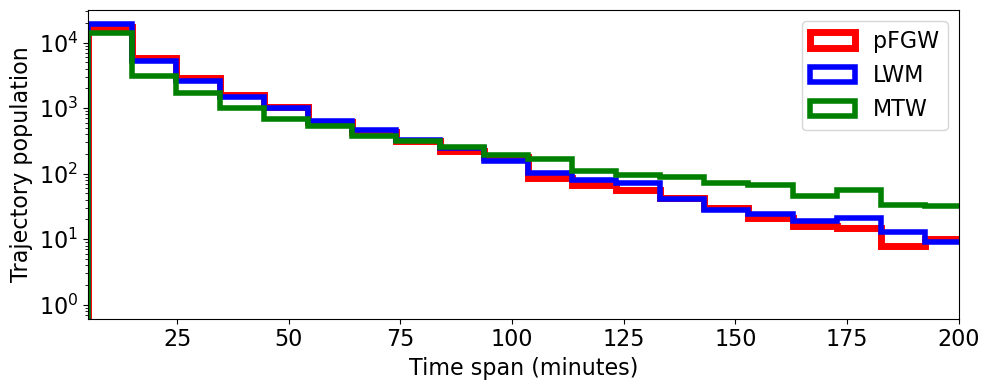

In [6]:
font = {
    "family": "sans-serif",
    "weight": "normal",
    "size": 16
}
plt.figure(figsize=(10, 4))

labels_technique = {"pFGW-system": "pFGW", "LWM": "LWM", "MT-Wasserstein": "MTW"}
colors_technique = {"pFGW-system": "red", "LWM": "blue", "MT-Wasserstein": "green"}
linewidths_technique = {"pFGW-system": 5, "LWM": 4, "MT-Wasserstein": 4, }

# unsimplified pFGW nSystems (CPPin) = 17178
for technique in techniques:
    all_durations = []
    for iDate in range(nDates):
        for daytime in time_period:
            tmp_duration = track_information[(technique, daytime)][iDate][4]
            all_durations.extend(tmp_duration)
    durations = np.asarray(all_durations)
    
    print("# trajactories of {}:".format(technique), len(durations))
    print("# cloud systems/objects of {}:".format(technique), np.sum(durations))

    
for technique in techniques:
    all_durations = []
    for iDate in range(nDates):
        for daytime in time_period:
            tmp_duration = track_information[(technique, daytime)][iDate][4]
            all_durations.extend(tmp_duration)
    durations = np.asarray(all_durations) * gap_size
    
    plt.hist(durations, bins=36, histtype="step", label=labels_technique[technique], 
             color=colors_technique[technique], linewidth=linewidths_technique[technique])

plt.yscale("log")
plt.xlabel("Time span (minutes)", font=font)
plt.ylabel("Trajectory population", font=font)

plt.xlim([5, 200])
# plt.xlim([5, 400])
plt.xticks(font=font)
plt.yticks(font=font)

plt.legend(prop=font)
plt.tight_layout()

plt.show()

### Plot 4. Bar plot for the evaluation statistics

* the median of trajectory durations 

* the mean of standard deviation of trajectory properties on tracks with duration > median
  - property 1. mean of cloud COD
  - property 2. standard deviation of cloud COD
  
* the root-mean-square error (RMSE) for the centroid locations of cloud systems on trajectories with duration > median

In [7]:
# statistical evaluation
labels = techniques
# labels = ["pFGW"] 
font = {
    "family": "sans-serif",
    "weight": "normal",
    "size": 30
}

smallfont = {
    "family": "sans-serif",
    "weight": "normal",
    "size": 24
}

tinyfont = {
    "family": "sans-serif",
    "weight": "normal",
    "size": 20
}

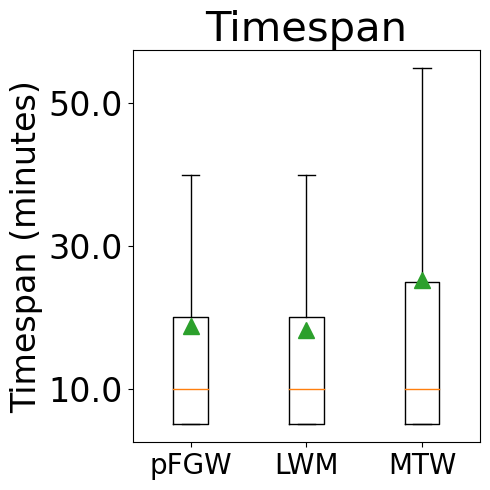

In [8]:
# Plot 4.1: median of trajectory durations
timespan_list = []

for label in labels:
    all_durations = []
    for iDate in range(nDates):
        for daytime in time_period:
            tmp_duration = track_information[(label, daytime)][iDate][4]
            all_durations.extend(tmp_duration)
    durations = np.asarray(all_durations) * gap_size
    # durations = np.asarray(track_information[label][4]) * gap_size
    timespan_list.append(durations)
    
plt.figure(figsize=(5, 5))
# plt.subplot(121)
# plt.violinplot(timespan_list, showmeans=False, showmedians=False)
# plt.xticks(range(1, len(labels)+1), labels, font=smallfont)
# plt.yticks(font=smallfont)
# # plt.title("West of Africa")
# # plt.xlabel("Strategy")
# plt.ylabel("Time span (minutes)", font=smallfont)

# plt.subplot(122)
plt.boxplot(timespan_list, showmeans=True, showfliers=False, meanprops={"markersize": 12})
plt.xticks(range(1, len(labels)+1), [labels_technique[each] for each in labels], font=tinyfont, rotation=0, ha='center')

yticks_pos, yticks_labels = plt.yticks(font=smallfont)
yticks_pos = yticks_pos[1::2]
plt.yticks(yticks_pos, yticks_pos, font=smallfont)

plt.title("Timespan", font=font)
# plt.title("West of Africa")
# plt.xlabel("Strategy")
plt.ylabel("Timespan (minutes)", font=smallfont)
plt.tight_layout()
plt.show()


medians = {labels[i]: np.median(timespan_list[i]) / gap_size for i in range(len(labels))}

In [9]:
# Plot 4.2: the mean STD of cloud system/object property

def get_trajectory_properties(clustered_sfs, cloud_id_mapping, value_list, median, measure="mean", debug=False):
    std_track_properties = []
    track_ids = np.unique(list(cloud_id_mapping.values()))
    track_instances = {}
    for key in cloud_id_mapping:
        time_step, seg_id = key
        val = cloud_id_mapping[key]
        if val not in track_instances:
            track_instances[val] = [(time_step, seg_id)]
        else:
            track_instances[val].append((time_step, seg_id))
    
    for track_id in track_instances:
        regions = track_instances[track_id]
        regions.sort()
        
        if len(regions) <= median:
            continue
        
        track_property = []
        for time_step, seg_id in regions:
            segmentation = clustered_sfs[time_step]
            values = value_list[time_step]
            assert segmentation.shape == values.shape
            
            seg_values = values[segmentation == seg_id]
            if len(seg_values) == 0:
                print(seg_id, np.unique(segmentation))
            if measure == "mean":
                prop = np.mean(seg_values)
            elif measure == "std":
                prop = np.std(seg_values)
            else:
                raise NotImplementedError
            track_property.append(prop)
        
        std_track_property = np.std(track_property)
        std_track_properties.append(std_track_property)
    
    return track_instances, std_track_properties

In [10]:
import readMergeTree as rmt
# Additional step: load scalar fields
dataset_base = "20180501_juelich"

region_lists = {}
value_lists = {}

for iDate in range(len(dates)):
    date = dates[iDate]
    for daytime in time_period:
        dataset = dataset_base.replace("20180501", date)
        dataset_path = os.path.join("data", dataset)

        region_list = []
        value_list = []
        for froot, di, files in os.walk(dataset_path):
            def key(s):
                try:
                    int(s)
                    return int(s)
                except ValueError:
                    return len(files) + 1

            def isSegmentation(s: str):
                return "segmentation" in s

            def endsWithTxt(s: str):
                return s.endswith("txt")

            def endsWithNpy(s: str):
                return s.endswith("npy")

            txt_files = list(filter(endsWithTxt, files))
            txt_files.sort(key=lambda x: key(x.split(".")[0].split("_")[-1]))

            for file in txt_files:
                regions, values = rmt.get_regions(os.path.join(dataset_path, file))
                region_list.extend(regions)
                value_list.extend(values)

        assert (len(region_list) == len(value_list))
        
        st_time, ed_time = time_period[daytime]

        region_lists[(iDate, daytime)] = region_list[st_time:ed_time+1]
        value_lists[(iDate, daytime)] = value_list[st_time:ed_time+1]


In [11]:
for each in medians:
    if medians[each] < 2:
        medians[each] = 2.0

print(medians)

{'pFGW-system': 2.0, 'LWM': 2.0, 'MT-Wasserstein': 2.0}


In [12]:
# Step 1: we collect the trajectory information
measure = "mean"
track_instances_technique = {}
std_track_properties_technique = {}
for technique in techniques:
    for iDate in range(nDates):
        for daytime in time_period:
            print("technique, date, daytime:", technique, dates[iDate], daytime)
            clustered_sfs, centroids, mapping_scores, cloud_id_mapping, durations = track_information[(technique, daytime)][iDate][:5]

            # value_list has the original scalar field
            value_list = value_lists[(iDate, daytime)]
            print(len(value_list), len(clustered_sfs))
            assert len(value_list) == len(clustered_sfs)
            track_instances, std_track_properties = get_trajectory_properties(clustered_sfs, cloud_id_mapping, value_list, medians[technique], measure, debug=technique=="tobac")
            track_instances_technique[(technique, daytime, iDate)] = track_instances
            std_track_properties_technique[(technique, daytime, iDate)] = std_track_properties

technique, date, daytime: pFGW-system 20180501 mid-day
72 72
technique, date, daytime: pFGW-system 20180623 mid-day
72 72
technique, date, daytime: pFGW-system 20190512 mid-day
72 72
technique, date, daytime: LWM 20180501 mid-day
72 72
technique, date, daytime: LWM 20180623 mid-day
72 72
technique, date, daytime: LWM 20190512 mid-day
72 72
technique, date, daytime: MT-Wasserstein 20180501 mid-day
72 72
technique, date, daytime: MT-Wasserstein 20180623 mid-day
72 72
technique, date, daytime: MT-Wasserstein 20190512 mid-day
72 72


In [13]:
# plt.figure(figsize=(3, 4))

# mean_std_track_trajectories_list = []# np.mean(std_track_properties_technique[(labels[i], j)]) for i in range(len(labels)) for j in range(nDates)]
# for label in labels:
#     std_track_properties = []
#     for iDate in range(nDates):
#         std_track_properties.extend(std_track_properties_technique[(label, iDate)])
#     print(std_track_properties)
#     mean_std_track_trajectories_list.append(np.asarray(std_track_properties))

# plt.bar(labels, mean_std_track_trajectories_list)
# # plt.title("West of Africa")
# plt.xlabel("Strategy")
# plt.ylabel("Mean of STD of COD{}".format(measure[0]))

mean: 1.559960771782646
median: 1.2308405668745126
mean: 1.5771193855064778
median: 1.247491042316081
mean: 1.540685289983294
median: 1.0308397497239885


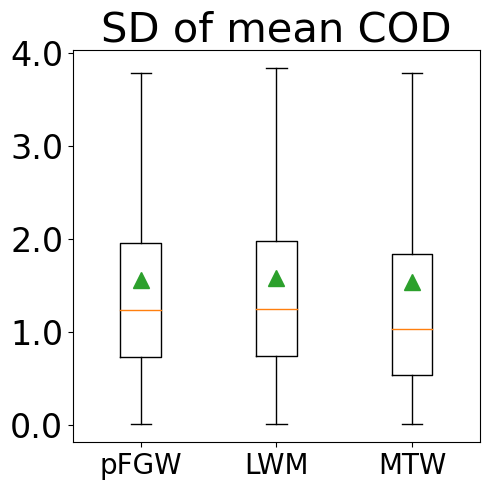

In [14]:
std_track_trajectories_list = []
for label in labels:
    std_track_properties = []
    for iDate in range(nDates):
        for daytime in time_period:
            std_track_properties.extend(std_track_properties_technique[(label, daytime, iDate)])
    std_track_trajectories_list.append(np.asarray(std_track_properties))
    
plt.figure(figsize=(5, 5))
# plt.subplot(121)
# plt.violinplot(std_track_trajectories_list, showmeans=False, showmedians=False)
# plt.xticks(range(1, len(labels)+1), labels, font=smallfont)
# plt.yticks(font=smallfont)
# # plt.title("West of Africa")
# # plt.xlabel("Strategy")
# plt.ylabel("Std Dev. of COD{}".format(measure[0]), font=smallfont)

# plt.subplot(122)
plt.boxplot(std_track_trajectories_list, showmeans=True, showfliers=False, meanprops={"markersize": 12})
plt.xticks(range(1, len(labels)+1), [labels_technique[each] for each in labels], font=tinyfont, rotation=0, ha='center')

yticks_pos, yticks_labels = plt.yticks(font=smallfont)
yticks_pos = yticks_pos[1::2]
plt.yticks(yticks_pos, yticks_pos, font=smallfont)

plt.title("SD of {} COD".format(measure), font=font)
plt.tight_layout()

# plt.title("West of Africa")
# plt.xlabel("Strategy")
# plt.ylabel("Std Dev. of COD{}".format(measure[0]), font=smallfont)

for ss in std_track_trajectories_list:
    print("mean:", np.mean(ss))
    print("median:", np.median(ss))

In [15]:
def get_trajectory_line_fit(track_instances, centroids, median):
    root_mses = []
    
    for track_id in track_instances:
        regions = track_instances[track_id]
        regions.sort()
        
        if len(regions) <= median:
            continue
        
        xs = []
        ys = []
        for time_step, seg_id in regions:
            segmentation = clustered_sfs[time_step]
            values = value_list[time_step]
            assert segmentation.shape == values.shape
            
            xs.append(time_step)
            ys.append(centroids[time_step][seg_id])
        
        p, residuals, rank, singular_values, rcond = np.polyfit(xs, ys, 1, full=True)
        root_mses.append(np.sum(np.sqrt(residuals)))
        
    return root_mses

In [16]:
std_track_linefit_technique = {}
for technique in techniques:
    for iDate in range(nDates):
        for daytime in time_period:
            date = dates[iDate]
            print("technique:", technique)
            clustered_sfs, centroids, mapping_scores, cloud_id_mapping, durations = track_information[(technique, daytime)][iDate][:5]
            track_instances = track_instances_technique[(technique, daytime, iDate)]

            value_list = value_lists[(iDate, daytime)]
            # value_list has the original scalar field
            assert len(value_list) == len(clustered_sfs)
            root_mses = get_trajectory_line_fit(track_instances, centroids, medians[technique])
            std_track_linefit_technique[(technique, daytime, iDate)] = root_mses

technique: pFGW-system
technique: pFGW-system
technique: pFGW-system
technique: LWM
technique: LWM
technique: LWM
technique: MT-Wasserstein
technique: MT-Wasserstein
technique: MT-Wasserstein


mean: 4.010645918330924
median: 2.1872688908010076
mean: 4.63295309062917
median: 2.1542563266142727
mean: 439.97082472687595
median: 360.9732596190646


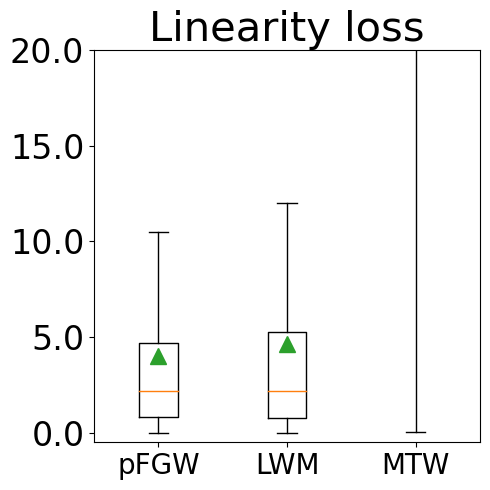

In [17]:
std_track_linefit_list = []
for label in labels:
    std_track_linefits = []
    for iDate in range(nDates):
        for daytime in time_period:
            std_track_linefits.extend(std_track_linefit_technique[(label, daytime, iDate)])
    std_track_linefit_list.append(np.asarray(std_track_linefits))
    
plt.figure(figsize=(5, 5))

# plt.subplot(121)
# plt.violinplot(std_track_linefit_list, showmeans=False, showmedians=False)
# plt.xticks(range(1, len(labels)+1), labels, font=smallfont)
# plt.yticks(font=smallfont)
# # plt.title("West of Africa")
# # plt.xlabel("Strategy")
# plt.ylabel("Linearity error", font=smallfont)

# plt.subplot(122)

plt.boxplot(std_track_linefit_list, labels=labels, showmeans=True, showfliers=False, meanprops={"markersize": 12})
plt.xticks(range(1, len(labels)+1), [labels_technique[each] for each in labels], font=tinyfont, rotation=0, ha='center')

plt.ylim([-0.5, 20])
yticks_pos, yticks_labels = plt.yticks(font=smallfont)
yticks_pos = yticks_pos[1::2]
plt.yticks(yticks_pos, yticks_pos, font=smallfont)

plt.title("Linearity loss", font=font)
# # plt.xlabel("Strategy")
# plt.ylabel("Linearity loss", font=smallfont)
plt.tight_layout()

for ss in std_track_linefit_list:
    print("mean:", np.mean(ss))
    print("median:", np.median(ss))

### Section 3. Appendix plots for parameter justification

In [18]:
# # plot: max matched distance
# dist_table_path = "./binary-parameter-tuning/CPPin20230801_0percent"

# filename = "m_tuning_stats_alpha_0.2.csv"

# import pandas as pd
# dist_table = pd.read_csv(pjoin(dist_table_path, filename)).to_dict()

In [19]:
# dist_ms = dist_table['m']
# dist_mmds = dist_table["max_matched_distance"]

# def parse_list_str(st):
#     st = st.replace("[", "").replace("]", "").strip()
#     items = st.split(",")
#     lst = []
#     for item in items:
#         lst.append(float(item))
#     return lst

# lst_ms = []
# lst_mmds = []
# for key in dist_ms:
#     tmp_ms = parse_list_str(dist_ms[key])
#     tmp_mmds = parse_list_str(dist_mmds[key])
#     combined = list(zip(tmp_ms, tmp_mmds))
#     combined.sort()
#     ms = [i for i, j in combined]
#     mmds = [j for i, j in combined]
#     lst_ms.append(ms)
#     lst_mmds.append(mmds)

In [20]:
# plt.figure(figsize=(16, 8))
# for i in range(len(lst_ms)):
#     ms = lst_ms[i]
#     mmds = lst_mmds[i]
    
#     plt.plot(ms, mmds, label=str(i))
# plt.show()